<a href="https://www.quantrocket.com"><img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png"></a>

***
[Sell-on-Gap Strategy](Introduction.ipynb) › Part 6: Trade Inspection
***

# Trade inspection

This notebook shows how to inspect individual trades.

First, we can load the transactions and identify a trade to look at. Here we load transactions for a particular month:

In [1]:
from quantrocket.zipline import ZiplineBacktestResult
result = ZiplineBacktestResult.from_csv("sell_gap_backtest_results.csv")
transactions = result.transactions

# Set UTC to America/New_York time for convenience
transactions = transactions.tz_convert("America/New_York").tz_localize(None)
transactions.loc["2020-02"]

column,amount,order_id,price,sid,symbol,txn_dollars
date,,,,,,
2020-02-03 09:41:00,-439,571593b1c8534b2c8e5da775987f0950,113.600910,Equity(FIBBG000K82ZT8 [CHKP]),Equity(FIBBG000K82ZT8 [CHKP]),49870.799270
2020-02-03 15:56:00,439,3fc0f5dd0c234182ac159bf35610bae0,113.604071,Equity(FIBBG000K82ZT8 [CHKP]),Equity(FIBBG000K82ZT8 [CHKP]),-49872.187169
2020-02-06 09:41:00,-202,50801cf0507c40dfbc09ef6abfeefd22,245.486332,Equity(FIBBG000BCZYD3 [BDX]),Equity(FIBBG000BCZYD3 [BDX]),49588.239064
2020-02-06 09:41:00,-766,587fae042a074dadaded67a518da68b5,64.910521,Equity(FIBBG005D7PF34 [CDAY]),Equity(FIBBG005D7PF34 [CDAY]),49721.459086
2020-02-06 09:41:00,-484,07b1673fcddb478f8a069e501b29a68c,103.368980,Equity(FIBBG000BH3GZ2 [YUM]),Equity(FIBBG000BH3GZ2 [YUM]),50030.586320
2020-02-06 15:56:00,202,313461191c374d869b9b2f224c8a71fd,253.095906,Equity(FIBBG000BCZYD3 [BDX]),Equity(FIBBG000BCZYD3 [BDX]),-51125.373012
2020-02-06 15:56:00,766,f5d3502a8ab2403d9812e2225d6e51a3,65.749719,Equity(FIBBG005D7PF34 [CDAY]),Equity(FIBBG005D7PF34 [CDAY]),-50364.284754
2020-02-06 15:56:00,484,9d35328893c943a7ac93476be57cb592,103.806133,Equity(FIBBG000BH3GZ2 [YUM]),Equity(FIBBG000BH3GZ2 [YUM]),-50242.168130
2020-02-07 09:41:00,-434,8aa478626fa449da9b7a05bf7ad7319d,114.935509,Equity(FIBBG000BS1YV5 [TTWO]),Equity(FIBBG000BS1YV5 [TTWO]),49882.010906


Let's pick a single stock, TTWO:

In [2]:
SID = "FIBBG000BS1YV5"
DATE = "2020-02-07"

trade = transactions[transactions.sid==SID].loc[DATE]
trade

column,amount,order_id,price,sid,symbol,txn_dollars
date,,,,,,
2020-02-07 09:41:00,-434,8aa478626fa449da9b7a05bf7ad7319d,114.935509,Equity(FIBBG000BS1YV5 [TTWO]),Equity(FIBBG000BS1YV5 [TTWO]),49882.010906
2020-02-07 15:56:00,434,3be18c93e902485e9576231d6164655e,112.868850,Equity(FIBBG000BS1YV5 [TTWO]),Equity(FIBBG000BS1YV5 [TTWO]),-48985.081117


We use the data object to load minutes prices for this sid and date, looking back 390 minutes from the session close to get the entire trading day:

In [3]:
from zipline.research import get_data, sid
data = get_data(f"{DATE} 16:00:00")

minute_prices = data.history(sid(SID), "close", 390, "1m")

# Zipline timestamps are in UTC, convert to New York time for convenience
minute_prices.index = minute_prices.index.tz_convert("America/New_York").tz_localize(None)

Then we plot the minute prices and add trade markers for our buy and sell transactions:

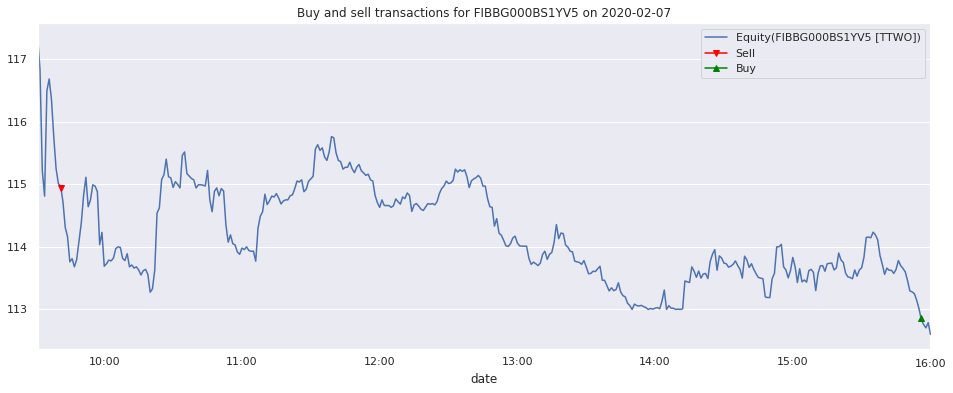

In [4]:
# Plot minute prices
ax = minute_prices.plot(title=f"Buy and sell transactions for {SID} on {DATE}")
    
# Add the trade markers
trade[trade.amount<0].price.plot(ax=ax, marker="v", color="red", label="Sell")
trade[trade.amount>0].price.plot(ax=ax, marker="^", color="green", label="Buy")

ax.legend()

***

## *Next Up*

Part 7: [Broker-Specific Steps for Live Trading](Part7-Broker-Specific-Steps.ipynb)